https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

This dataset is from a Portuguese banking institution and is used to predict if a client will subscribe to a term deposit. Researchers can use this data to understand what factors influence a client’s decision to subscribe to a term deposit which can inform marketing strategies for banks.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data=pd.read_csv('banking.csv')
data.head()

## EDA

In [ ]:
data.info() #datatype of columns look fine

In [ ]:
data.describe()

* Age looks symmetrical as mean and median (50%) are almost same, range shows wide-range of age groups being targeted
* Duration is right skewed which means some calls are very long (in duration), implies outliers
* On an average, each customer was called more than twice, max is very high (outlier)
* Most of the people were not contacted after the previous campaign?
* employment variation rate is left skewed (mean<<median)
* consumer price index looks sysmmetric without much variation in the data points for all the customers (meaning this column could be removed)
* consumer confidence index is symmetric (we need to know the scale for measuring this e.g. does this score fall b/w -100 to 100 or 100 to 0 to get further insights)
* euribor 3 month rate is slightly left skewed



In [ ]:
data.isnull().sum() #there are no null values

In [ ]:
for col in data.columns:
    if data[col].dtype=='object':
        temp=data[col].value_counts()
        print(temp)
#clean education column categories, there is class imalance in my columns

In [ ]:
data.education=data.education.replace(r'^basic\..*', 'basic', regex=True)

In [ ]:
data.y.value_counts() #there is massive imbalance in the target class

### Univariate Analysis

In [ ]:
data.job.unique()

In [ ]:
#visualizing categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        temp = data[col].value_counts()

        fig, ax = plt.subplots()
        ax.bar(temp.index, temp.values)
        
        ax.set_xlabel('Categories')
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {col}')

        ax.set_xticklabels(temp.index, rotation=90, ha='center')  # Adjust rotation angle as needed
        plt.show()


In [ ]:
# visualise non-object columns
# check how every column is related to y
# how to take out important columns from all thesea
# check for outliers, imbalanced class, categorical to numerical
# which all models to use to make prediction
# how to preprocess the input before giving to model in deployment

In [ ]:
#numerical columns distribution
import seaborn as sns
for col in data.columns:
    if data[col].dtype!='object':
        # ax, fig=plt.subplots()
        sns.histplot(data[col], bins=20, kde=True)
        plt.show()


In [ ]:
data.previous.value_counts()

In [ ]:
# data=(pd.get_dummies(data, columns=['job','marital','default','housing','loan','contact','month','day_of_week','poutcome'],dtype=int, drop_first =True,
#                                   ))

In [ ]:
# data.education=data.education.replace({'illiterate':1,'basic': 2,'high.school':3,'professional.course':4,'university.degree':5,'unknown':0})

### Bivariate

In [ ]:
#age vs y. The plot does not show any strong correlation b/w age. Elder people seem to have subscribed more. Otherwise both the classes' distribution is similar
plt.figure(figsize=(10, 6))
sns.histplot(data[data['y'] == 0]['age'], color='blue', label='Not subscribed', kde=True)
sns.histplot(data[data['y'] == 1]['age'], color='orange', label='Subscribed', kde=True)
plt.legend()
plt.show()

In [ ]:
#job vs y: retired and students subscribed in highest percentage. We can consider making two new columns- student (yes/no) and retired(yes/no)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
job_subscriptions = data.groupby('job')['y'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='job', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='job', y=1, color='blue', label='Subscribed')

# Adding annotations
for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

# Adding labels and title
plt.xlabel('Job Category')
plt.ylabel('Percentage')
plt.title('Subscription Status by Job Category')
plt.legend(title='Subscription Status')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# marital vs y (I am assuming marital will have less correlation with y): there is no correlation as such

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
job_subscriptions = data.groupby('marital')['y'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='marital', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='marital', y=1, color='blue', label='Subscribed')

# Adding annotations
for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Subscription Status by Marital Status')
plt.legend(title='Subscription Status')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()


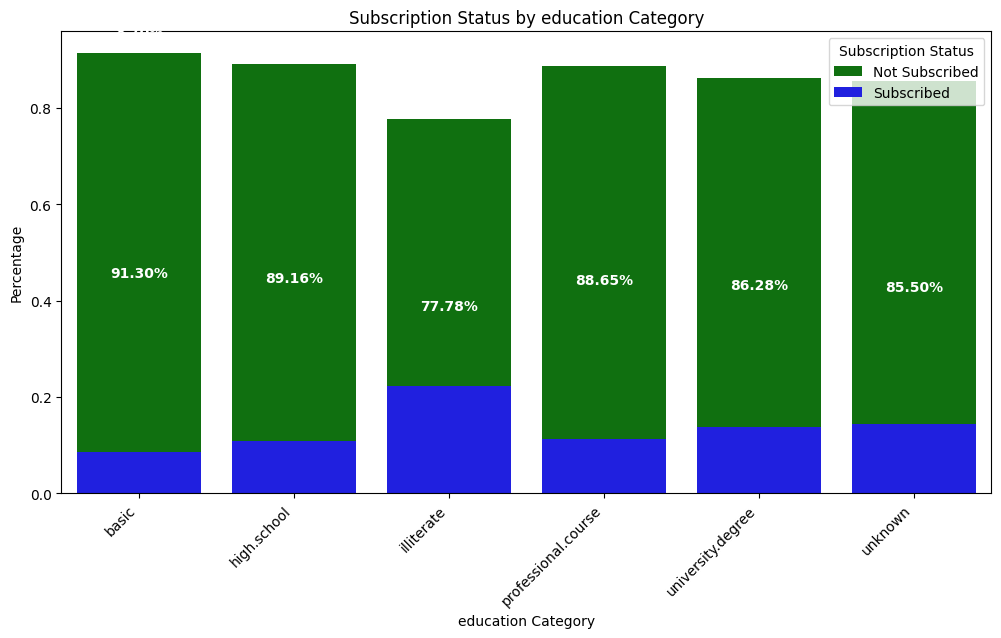

In [194]:
#education vs y: illeterate people have highest percentage of subscription (if education and job has a correlation, we can drop education)
# drop education and make another feature- illeterate (yes/no)

# Assuming 'data' is your DataFrame
job_subscriptions = data.groupby('education')['y'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='education', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='education', y=1, color='blue', label='Subscribed')

# Adding annotations
for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

# Adding labels and title
plt.xlabel('education Category')
plt.ylabel('Percentage')
plt.title('Subscription Status by education Category')
plt.legend(title='Subscription Status')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# default vs y (most of the values are 'no', there are only 3 entries for 'yes' so we might consider dropping this)
job_subscriptions = data.groupby('default')['y'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='default', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='default', y=1, color='blue', label='Subscribed')

# Adding annotations
for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

# Adding labels and title
plt.xlabel('default Category')
plt.ylabel('Percentage')
plt.title('Subscription Status by default Category')
plt.legend(title='Subscription Status')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# housing vs y (might be less correlated): almost same response for all the categories, therefore drop
job_subscriptions = data.groupby('housing')['y'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='housing', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='housing', y=1, color='blue', label='Subscribed')

# Adding annotations
for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

# Adding labels and title
plt.xlabel('Housing Category')
plt.ylabel('Percentage')
plt.title('Subscription Status by Housing Category')
plt.legend(title='Subscription Status')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# loan vs y: doesn't seem to have much impact on 'y'

job_subscriptions = data.groupby('loan')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='loan', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='loan', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('Loan Category')
plt.ylabel('Percentage')
plt.title('Subscription Status by Loan Category')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# contact vs y: not huge variation though
job_subscriptions = data.groupby('contact')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='contact', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='contact', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('Contact Category')
plt.ylabel('Percentage')
plt.title('Subscription Status by Contact Category')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# mongth vs y: seem to have some correlation but for months with high subscriptions, there is very low count
job_subscriptions = data.groupby('month')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='month', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='month', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Subscription Status by Month')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# day_of_week vs y: doesn't seem to have any correlation as such
job_subscriptions = data.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='day_of_week', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='day_of_week', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('day_of_week')
plt.ylabel('Percentage')
plt.title('Subscription Status by day_of_week')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# duration (we might drop it): as the duration increased, more people subscribed
plt.figure(figsize=(10, 6))
sns.histplot(data[data['y'] == 0]['duration'], color='blue', label='Class 0', kde=True)
sns.histplot(data[data['y'] == 1]['duration'], color='orange', label='Class 1', kde=True)
plt.legend()
plt.show()

In [ ]:
# campaign vs y: doesn't seem to have substaintial impact
plt.figure(figsize=(10, 6))
sns.histplot(data[data['y'] == 0]['campaign'], color='blue', label='Class 0', kde=True)
sns.histplot(data[data['y'] == 1]['campaign'], color='orange', label='Class 1', kde=True)
plt.legend()
plt.show()

In [ ]:
# pdays (most of the values are '999' meaning not contacted, therefore, can drop it)
plt.figure(figsize=(10, 6))
sns.histplot(data[(data['y'] == 0) & (data['pdays'] != 999)]['pdays'], color='blue', label='Class 0', kde=True)
sns.histplot(data[(data['y'] == 1) & (data['pdays'] != 999)]['pdays'], color='orange', label='Class 1', kde=True)
plt.legend()
plt.show()

In [ ]:
# pevious vs y (most of the values are 0, therefore, consider dropping)
plt.figure(figsize=(10, 6))
sns.histplot(data[(data['y'] == 0)]['previous'], color='blue', label='Class 0', kde=True)
sns.histplot(data[(data['y'] == 1)]['previous'], color='orange', label='Class 1', kde=True)
plt.legend()
plt.show()

In [ ]:
# poutcome vs y
job_subscriptions = data.groupby('poutcome')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='poutcome', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='poutcome', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('poutcome')
plt.ylabel('Percentage')
plt.title('Subscription Status by poutcome')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# emp_var_rate vs y: seems to have some correlation with 'y'
job_subscriptions = data.groupby('emp_var_rate')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='emp_var_rate', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='emp_var_rate', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('emp_var_rate')
plt.ylabel('Percentage')
plt.title('Subscription Status by emp_var_rate')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# cons_price_idx vs y
plt.figure(figsize=(10, 6))
sns.histplot(data[(data['y'] == 0)]['cons_price_idx'], color='blue', label='Class 0', kde=True)
sns.histplot(data[(data['y'] == 1)]['cons_price_idx'], color='orange', label='Class 1', kde=True)
plt.legend()
plt.show()

In [ ]:
# euribor3m vs y
plt.figure(figsize=(10, 6))
sns.histplot(data[(data['y'] == 0)]['euribor3m'], color='blue', label='Class 0', kde=True)
sns.histplot(data[(data['y'] == 1)]['euribor3m'], color='orange', label='Class 1', kde=True)
plt.legend()
plt.show()

In [ ]:
# nr_employed vs y: seems to be some correlation
job_subscriptions = data.groupby('nr_employed')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscriptions.reset_index(), x='nr_employed', y=0, color='green', label='Not Subscribed')
sns.barplot(data=job_subscriptions.reset_index(), x='nr_employed', y=1, color='blue', label='Subscribed')

for i, (not_subscribed, subscribed) in enumerate(zip(job_subscriptions[0], job_subscriptions[1])):
    plt.text(i, not_subscribed / 2, f'{not_subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')
    plt.text(i, not_subscribed + subscribed / 2, f'{subscribed:.2%}', va='center', ha='center', color='white', fontsize=10, weight='bold')

plt.xlabel('nr_employed')
plt.ylabel('Percentage')
plt.title('Subscription Status by nr_employed')
plt.legend(title='Subscription Status')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#job vs housing: since there is significatnt correlation between these two, we can drop one of them
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
job_education_contingency = pd.crosstab(data['job'], data['education'])

# Performing Chi-Square test
chi2, p, _, _ = chi2_contingency(job_education_contingency)

# Display results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between 'job' and 'education'.")
else:
    print("There is no significant association between 'job' and 'education'.")


In [ ]:
#education vs job
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
job_education_contingency = pd.crosstab(data['job'], data['housing'])

# Performing Chi-Square test
chi2, p, _, _ = chi2_contingency(job_education_contingency)

# Display results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between 'job' and 'education'.")
else:
    print("There is no significant association between 'job' and 'education'.")


In [ ]:
#job vs marital: can keep one since higher correlation
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
job_education_contingency = pd.crosstab(data['job'], data['marital'])

# Performing Chi-Square test
chi2, p, _, _ = chi2_contingency(job_education_contingency)

# Display results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between 'job' and 'marital status")
else:
    print("There is no significant association between 'job' and 'marital status'.")


In [ ]:
#job vs contact: can keep one since higher correlation: keep one
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
job_education_contingency = pd.crosstab(data['job'], data['contact'])

# Performing Chi-Square test
chi2, p, _, _ = chi2_contingency(job_education_contingency)

# Display results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between 'job' and 'education'.")
else:
    print("There is no significant association between 'job' and 'education'.")


In [ ]:
#job vs contact: can keep one since higher correlation: keep one
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
job_education_contingency = pd.crosstab(data['y'], data['poutcome'])

# Performing Chi-Square test
chi2, p, _, _ = chi2_contingency(job_education_contingency)

# Display results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between 'y' and 'default'.")
else:
    print("There is no significant association between 'job' and 'education'.")


In [ ]:
from scipy.stats import kruskal

# Assuming 'data' is your DataFrame
result = kruskal(data['emp_var_rate'], data['y'])
print(f"Kruskal-Wallis H-Statistic: {result.statistic}")
print(f"P-Value: {result.pvalue}")
if result.pvalue<0.05:
    print('there is a significant relationship')
else:
    print("there is no significant relationship")

### Feature Selection

In [ ]:
#dropping other columns based on the insights from visualizations, test, and automated 
df=data[['age','job','education','month','nr_employed','euribor3m']]
df.head()

In [ ]:
# Assuming 'data' is your DataFrame
numerical_columns = df.select_dtypes(include='number').columns
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    if any(outliers):
        print(f'{column}: has outliers')
        # print(f'Outliers in {column}: {df[outliers][column].tolist()}')
        

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])
plt.title(f'Box Plot for Age')
plt.show()

In [ ]:
df=pd.get_dummies(df,columns=['job','month'],dtype=int, drop_first =True)

In [ ]:
df.education=df.education.replace({'illiterate':0,'basic': 1,'high.school':2,'professional.course':3,'university.degree':4,'unknown':5})

In [ ]:
df.head()

### Model Training

In [ ]:
target=data['y']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df,target,
    test_size=0.2, random_state=10 )

#### Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
n_estimators=[23,51,101]
max_features=['log2', 'sqrt']
max_depth=[20,30,40,50,60]
min_samples_split=[100,200,150,250]
min_samples_leaf=[1,2,3]
bootstrap=[True,False]

random_grid={
  'n_estimators': n_estimators,
  'max_features':max_features
  ,'max_depth':max_depth,
  'min_samples_split':min_samples_split,
  'min_samples_leaf':min_samples_leaf,
  'bootstrap':bootstrap
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

model_tuning=RandomizedSearchCV(estimator=classifier, param_distributions=random_grid, n_iter=50,random_state=12,verbose=3)

model_tuning.fit(x_train,y_train)

print('random grid', random_grid)
print('best parameters: ', model_tuning.best_params_)

best_param=model_tuning.best_params_

scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

model_tuned=RandomForestClassifier(n_estimators= best_param['n_estimators'], max_depth= best_param['max_depth'],
                                 max_features=best_param['max_features'], min_samples_split=best_param['min_samples_split'],
                                min_samples_leaf=best_param['min_samples_leaf'], bootstrap=best_param['bootstrap'])
model_tuned.fit(x_train,y_train)

In [ ]:
# CLASS WEIGHT ADJUSTED MODEL
class_weights = dict(zip([0, 1], [(1 / sum(y_train == class_label)) for class_label in [0, 1]]))
model_tuned=RandomForestClassifier(class_weight=class_weights,n_estimators= best_param['n_estimators'], max_depth= best_param['max_depth'],
                                 max_features=best_param['max_features'], min_samples_split=best_param['min_samples_split'],
                                min_samples_leaf=best_param['min_samples_leaf'], bootstrap=best_param['bootstrap'])
model_tuned.fit(x_train,y_train)

In [ ]:
#on training data
# model_tuned=best_model
pred1=model_tuned.predict(x_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_train,pred1)
prec= precision_score(y_train,pred1)
rec= recall_score(y_train,pred1)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

In [ ]:
#on test data
pred=model_tuned.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_test,pred)
prec= precision_score(y_test,pred)
rec= recall_score(y_test,pred)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

In [ ]:
#understanding how the model performs on both the classes separately
from sklearn.metrics import precision_score, recall_score, f1_score
# Assuming 'y_test' and 'pred' are your true and predicted labels
precision_0 = precision_score(y_test, pred, pos_label=0)
recall_0 = recall_score(y_test, pred, pos_label=0)
f1_0 = f1_score(y_test, pred, pos_label=0)

precision_1 = precision_score(y_test, pred, pos_label=1)
recall_1 = recall_score(y_test, pred, pos_label=1)
f1_1 = f1_score(y_test, pred, pos_label=1)

print('Class 0 Metrics:')
print(f'Precision: {precision_0}')
print(f'Recall: {recall_0}')
print(f'F1-Score: {f1_0}')

print('Class 1 Metrics:')
print(f'Precision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')


In [ ]:
#confusion matrix (y axis is actual and x axis is predicted)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)

#### Gradient Boost

In [ ]:
n_estimators=[23,51,101]
loss=['log_loss', 'exponential']
criterion=['friedman_mse', 'squared_error']
learning_rate=[0.1,0.2,0.5,0.7]
max_features=['log2', 'sqrt']
max_depth=[20,30,40,50,60]
min_samples_split=[100,200,150,250]
min_samples_leaf=[1,2,3]
# bootstrap=[True,False]

random_grid={
  'n_estimators': n_estimators,
    'loss':loss,
    'criterion':criterion,
    'learning_rate':learning_rate,
  'max_features':max_features
  ,'max_depth':max_depth,
  'min_samples_split':min_samples_split,
  'min_samples_leaf':min_samples_leaf
  # 'bootstrap':bootstrap
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()

model_tuning=RandomizedSearchCV(estimator=classifier, param_distributions=random_grid, n_iter=10,random_state=12,verbose=3)

model_tuning.fit(x_train,y_train)

print('random grid', random_grid)
print('best parameters: ', model_tuning.best_params_)

best_param=model_tuning.best_params_

model_tuned=GradientBoostingClassifier(n_estimators= best_param['n_estimators'], max_depth= best_param['max_depth'],
                                 max_features=best_param['max_features'], min_samples_split=best_param['min_samples_split'],
                                min_samples_leaf=best_param['min_samples_leaf'], loss=best_param['loss'],criterion=best_param['criterion'],
                                  learning_rate=best_param['learning_rate'])
class_weights = {0: 1, 1: 7}
model_tuned.fit(x_train,y_train,sample_weight=y_train.map(class_weights))

In [ ]:
#on training data
# model_tuned=best_model
pred1=model_tuned.predict(x_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_train,pred1)
prec= precision_score(y_train,pred1)
rec= recall_score(y_train,pred1)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

In [ ]:
#on test data
pred=model_tuned.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_test,pred)
prec= precision_score(y_test,pred)
rec= recall_score(y_test,pred)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

In [ ]:
#understanding how the model performs on both the classes separately
from sklearn.metrics import precision_score, recall_score, f1_score
# Assuming 'y_test' and 'pred' are your true and predicted labels
precision_0 = precision_score(y_test, pred, pos_label=0)
recall_0 = recall_score(y_test, pred, pos_label=0)
f1_0 = f1_score(y_test, pred, pos_label=0)

precision_1 = precision_score(y_test, pred, pos_label=1)
recall_1 = recall_score(y_test, pred, pos_label=1)
f1_1 = f1_score(y_test, pred, pos_label=1)

print('Class 0 Metrics:')
print(f'Precision: {precision_0}')
print(f'Recall: {recall_0}')
print(f'F1-Score: {f1_0}')

print('Class 1 Metrics:')
print(f'Precision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')


In [ ]:
#confusion matrix (y axis is actual and x axis is predicted)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)

### XGBoost

In [ ]:

from xgboost import XGBClassifier

# Create the XGBoost classifier
class_weights = sum(y_train == 0) / sum(y_train == 1)
xgb_model = XGBClassifier(random_state=42,scale_pos_weight=class_weights)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 4],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10,
    scoring='accuracy', cv=5, random_state=42, n_jobs=-1,verbose=3)

# class_weights = {0: 1, 1: 5}
# Perform the Randomized Search
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [ ]:
#on training data
model_tuned=best_model
pred1=model_tuned.predict(x_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_train,pred1)
prec= precision_score(y_train,pred1)
rec= recall_score(y_train,pred1)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

In [ ]:
#on test data
pred=model_tuned.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_test,pred)
prec= precision_score(y_test,pred)
rec= recall_score(y_test,pred)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

In [ ]:
#understanding how the model performs on both the classes separately
from sklearn.metrics import precision_score, recall_score, f1_score
# Assuming 'y_test' and 'pred' are your true and predicted labels
precision_0 = precision_score(y_test, pred, pos_label=0)
recall_0 = recall_score(y_test, pred, pos_label=0)
f1_0 = f1_score(y_test, pred, pos_label=0)

precision_1 = precision_score(y_test, pred, pos_label=1)
recall_1 = recall_score(y_test, pred, pos_label=1)
f1_1 = f1_score(y_test, pred, pos_label=1)

print('Class 0 Metrics:')
print(f'Precision: {precision_0}')
print(f'Recall: {recall_0}')
print(f'F1-Score: {f1_0}')

print('Class 1 Metrics:')
print(f'Precision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')


In [ ]:
#confusion matrix (y axis is actual and x axis is predicted)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)

### Under and Over Sampling

#### Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

model_tuning=RandomizedSearchCV(estimator=classifier, param_distributions=random_grid, n_iter=50,random_state=12,verbose=3)

model_tuning.fit(x_resampled,y_resampled)

print('random grid', random_grid)
print('best parameters: ', model_tuning.best_params_)

best_param=model_tuning.best_params_

scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

model_tuned=RandomForestClassifier(n_estimators= best_param['n_estimators'], max_depth= best_param['max_depth'],
                                 max_features=best_param['max_features'], min_samples_split=best_param['min_samples_split'],
                                min_samples_leaf=best_param['min_samples_leaf'], bootstrap=best_param['bootstrap'])
model_tuned.fit(x_train,y_train)

In [191]:
#on training data
model_tuned=model_tuning.best_estimator_
pred1=model_tuned.predict(x_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_train,pred1)
prec= precision_score(y_train,pred1)
rec= recall_score(y_train,pred1)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

{'accuracy': 0.83, 'precision': 0.36, 'recall': 0.64}


In [192]:
#on test data
pred=model_tuned.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_test,pred)
prec= precision_score(y_test,pred)
rec= recall_score(y_test,pred)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

{'accuracy': 0.84, 'precision': 0.38, 'recall': 0.65}


In [193]:
#understanding how the model performs on both the classes separately
from sklearn.metrics import precision_score, recall_score, f1_score
# Assuming 'y_test' and 'pred' are your true and predicted labels
precision_0 = precision_score(y_test, pred, pos_label=0)
recall_0 = recall_score(y_test, pred, pos_label=0)
f1_0 = f1_score(y_test, pred, pos_label=0)

precision_1 = precision_score(y_test, pred, pos_label=1)
recall_1 = recall_score(y_test, pred, pos_label=1)
f1_1 = f1_score(y_test, pred, pos_label=1)

print('Class 0 Metrics:')
print(f'Precision: {precision_0}')
print(f'Recall: {recall_0}')
print(f'F1-Score: {f1_0}')

print('Class 1 Metrics:')
print(f'Precision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')


Class 0 Metrics:
Precision: 0.9516443910497072
Recall: 0.8670132713093447
F1-Score: 0.9073596792668958
Class 1 Metrics:
Precision: 0.3844205193160228
Recall: 0.6533907427341227
F1-Score: 0.4840510366826156


In [ ]:
#confusion matrix (y axis is actual and x axis is predicted)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)

#### UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and apply RandomUnderSampler only on the training data
x_resampled, y_resampled = undersampler.fit_resample(x_train, y_train)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

model_tuning=RandomizedSearchCV(estimator=classifier, param_distributions=random_grid, n_iter=50,random_state=12,verbose=3)

model_tuning.fit(x_resampled,y_resampled)

print('random grid', random_grid)
print('best parameters: ', model_tuning.best_params_)

best_param=model_tuning.best_params_

scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

model_tuned=RandomForestClassifier(n_estimators= best_param['n_estimators'], max_depth= best_param['max_depth'],
                                 max_features=best_param['max_features'], min_samples_split=best_param['min_samples_split'],
                                min_samples_leaf=best_param['min_samples_leaf'], bootstrap=best_param['bootstrap'])
model_tuned.fit(x_resampled,y_resampled)

In [187]:
#on training data
# model_tuned=model_tuning.best_estimator_
pred1=model_tuned.predict(x_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_train,pred1)
prec= precision_score(y_train,pred1)
rec= recall_score(y_train,pred1)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

{'accuracy': 0.83, 'precision': 0.36, 'recall': 0.64}


In [188]:
#on test data
pred=model_tuned.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_test,pred)
prec= precision_score(y_test,pred)
rec= recall_score(y_test,pred)
print({'accuracy': round(acc,2), 'precision':round(prec,2), 'recall':round(rec,2)})

{'accuracy': 0.84, 'precision': 0.39, 'recall': 0.66}


In [189]:
#understanding how the model performs on both the classes separately
from sklearn.metrics import precision_score, recall_score, f1_score
# Assuming 'y_test' and 'pred' are your true and predicted labels
precision_0 = precision_score(y_test, pred, pos_label=0)
recall_0 = recall_score(y_test, pred, pos_label=0)
f1_0 = f1_score(y_test, pred, pos_label=0)

precision_1 = precision_score(y_test, pred, pos_label=1)
recall_1 = recall_score(y_test, pred, pos_label=1)
f1_1 = f1_score(y_test, pred, pos_label=1)

print('Class 0 Metrics:')
print(f'Precision: {precision_0}')
print(f'Recall: {recall_0}')
print(f'F1-Score: {f1_0}')

print('Class 1 Metrics:')
print(f'Precision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')


Class 0 Metrics:
Precision: 0.9523952545427241
Recall: 0.8676973594198932
F1-Score: 0.9080756013745704
Class 1 Metrics:
Precision: 0.3875870804306523
Recall: 0.658772874058127
F1-Score: 0.4880382775119617


In [ ]:
#confusion matrix (y axis is actual and x axis is predicted)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])